In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1500
D = 2
M = 3 #no of hidden nodes

In [3]:
X = np.random.randn(N, D)
#3 random gaussian clouds
X[:500] += np.array([0, -2]) 
X[:1000] += np.array([2, 2]) 
X[:1501] += np.array([-2, 2]) 

In [4]:
def convert_2_indicator(Yin) :
    N = len(Yin)
    K = np.max(Yin) + 1
    Yout = np.zeros((N, K))
    for n in range(N) :
        Yout[n, Yin[n]] = 1
    return Yout

def get_accuracy(Y, T) :
    Y_labels = np.argmax(Y, axis = 1)
    T_labels = np.argmax(T, axis = 1)
    return (Y_labels == T_labels).sum() / Y_labels.shape[0]

def my_softmax(A) :
    N = A.shape[0]
    M = A.shape[1]
    Out = np.zeros((N, M))
    for i in range(N) :
        for j in range(M) :
            Out[i][j] = np.exp(A[i][j]) / np.exp(A[i]).sum()
    return Out

def softmax(A) :
    expA = np.exp(A)
    return expA / expA.sum(axis = 1, keepdims=True)


In [5]:
T = np.array([0] * (N // 3) + [1] * (N // 3) + [2] * (N // 3))
T = convert_2_indicator(T)

In [6]:
#randomly initalizing input weights 
W = np.random.randn(D, M) / np.sqrt(D * M)
b = np.random.randn(M) / np.sqrt(M)
v = np.random.randn(M) / np.sqrt(M)
c = np.random.randn(1)

A = (np.tanh(X.dot(W) + b) * v) + c
Y = softmax(A)

In [7]:
print('Accuracy ', get_accuracy(Y, T))

Accuracy  0.32866666666666666


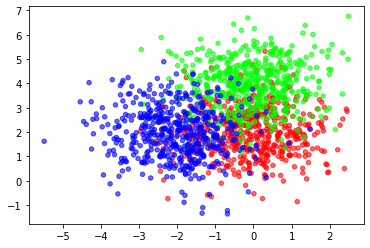

In [8]:
plt.scatter(X[:, 0], X[:, 1], s = 20, c = T, alpha = 0.6)

In [11]:
Y.shape  #result shape is N * M

(1500, 3)

In [21]:
z = np.tanh([3, 1])
a = z.dot(np.array([[0, 1], [1, 1]])).reshape((1, 2))
y = softmax(a)

In [22]:
y.shape

(1, 2)

In [10]:
A.shape

(1500, 3)